# 4.1 Classifying Movie Reviews Example

## Downloading and Preparing Data

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_labels[0]

1

In [5]:
# here’s how you can quickly decode one of these reviews back to English words.
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
## Transform Data into the Multi-hot encoding
import numpy as np


def vectorize_sequence(sequences, dimension=10000):
    all_zeroes = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for s in sequence:
            all_zeroes[i, s] = 1
    return all_zeroes


x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [7]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [8]:
# Vectorizing Labels too
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the Model

The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you’ll ever encounter. A type of model that performs well on such a problem is a plain stack of densely connected (Dense) layers with relu activations.

We will create a stack that we will know why we did it like this in the next chapter

In [42]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(units=16, activation="relu"),
    keras.layers.Dense(units=16, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

### What is the Number of Units?
1. The number of units in the Dense layer is: the dimensionality of representation space of the layer.
2. Each Dense layer with a relu activation implements the following chain of tensor operations: ``` output = relu(dot(input, W) + b). ```
3. Having X units means the weight matrix W will have shape (input_dimension, X)
4. The dimensionality of the representation space means “how much freedom you’re allowing the model to have when learning internal representations.”
5. Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations.
6. Having more units makes the model more computationally expensive 
7. Having more units may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data)

### What are ReLU and Sigmoid?
1. A relu (rectified linear unit) is a function meant to zero out negative values.
2. A sigmoid “squashes” arbitrary values into the [0, 1] interval. 

### What are activation functions, and why are they necessary?
- Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition.
```output = dot(input, W) + b```
-  A stack of layers or a layer could only learn linear transformations(affine transformations) of the input data when it has only linear transformations.
- In order to get access to a much richer hypothesis space that will benefit from deep representations, you need a non-linearity, or activation function.

# Choosing the Optimization and the Loss
For a binary classification model, you can use:
1. The binary_crossentropy loss.
2. The  mean_squared_error loss.

**Crossentropy** is usually the best choice when you’re dealing with models that output probabilities.

**Crossentropy** is a quantity from the field of information theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and model’s predictions.

**RMSProp** usually a good default choice for virtually any problem

In [43]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## Validation
A deep learning model should never be evaluated on its training data.
it’s standard practice to use a validation set to monitor the accuracy of the model during training

In [44]:
x_val = x_train[:10000]
y_val = y_train[:10000]

In [45]:
len(x_train), len(x_test)

(25000, 25000)

In [46]:
num_of_epochs = 30
history = model.fit(x_train, y_train, epochs=num_of_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
49/49 [==============================] - 3s 42ms/step - loss: 0.4373 - accuracy: 0.8038 - val_loss: 0.2887 - val_accuracy: 0.8882
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2575 - accuracy: 0.9005 - val_loss: 0.1678 - val_accuracy: 0.9457
Epoch 3/30
49/49 [==============================] - 1s 23ms/step - loss: 0.2015 - accuracy: 0.9254 - val_loss: 0.1372 - val_accuracy: 0.9587
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1761 - accuracy: 0.9377 - val_loss: 0.1421 - val_accuracy: 0.9524
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1549 - accuracy: 0.9459 - val_loss: 0.1100 - val_accuracy: 0.9693
Epoch 6/30
49/49 [==============================] - 1s 21ms/step - loss: 0.1403 - accuracy: 0.9540 - val_loss: 0.1283 - val_accuracy: 0.9604
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1319 - accuracy: 0.9567 - val_loss: 0.0988 - val_accuracy: 0.9741
Epoch 8/30
49

Note that the call to model.fit() returns a History object.
This object has a member history, which is a dictionary containing data about everything that happened during training

In [47]:
history_items = history.history.items()
for key, value in history_items:
    print(f"**** {key} ****")
    print(value)

**** loss ****
[0.43733444809913635, 0.2575370669364929, 0.20145337283611298, 0.17605555057525635, 0.15486450493335724, 0.14026834070682526, 0.13191896677017212, 0.12593631446361542, 0.10893313586711884, 0.11348694562911987, 0.10563161969184875, 0.10072633624076843, 0.09689681977033615, 0.09597604721784592, 0.0966675877571106, 0.09021732211112976, 0.09771504998207092, 0.10121281445026398, 0.10550142824649811, 0.11637440323829651, 0.09954925626516342, 0.1296175718307495, 0.13175107538700104, 0.12717305123806, 0.15106754004955292, 0.15117289125919342, 0.17137230932712555, 0.16808366775512695, 0.18851953744888306, 0.2272098809480667]
**** accuracy ****
[0.8037599921226501, 0.9005200266838074, 0.9253600239753723, 0.9376800060272217, 0.9458799958229065, 0.9539999961853027, 0.9567199945449829, 0.9581999778747559, 0.966159999370575, 0.9634799957275391, 0.9668800234794617, 0.9675599932670593, 0.9700400233268738, 0.9687600135803223, 0.9680799841880798, 0.9725199937820435, 0.9674800038337708, 0.

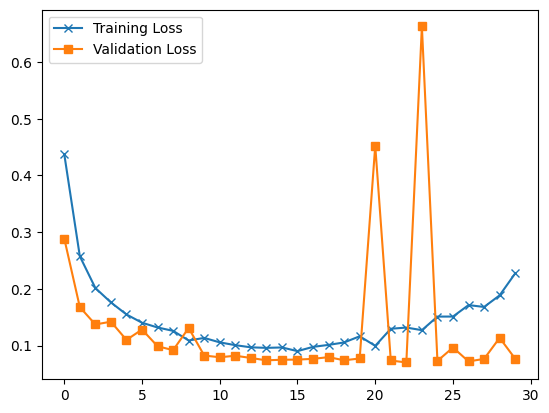

In [48]:
import matplotlib.pyplot as plt

plt.plot(list(range(num_of_epochs)), history.history['loss'], marker="x", label="Training Loss")
plt.plot(list(range(num_of_epochs)), history.history['val_loss'], marker="s", label="Validation Loss")
plt.legend()

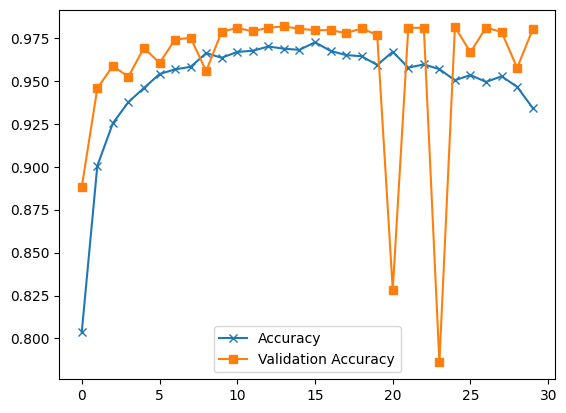

In [49]:
plt.plot(list(range(num_of_epochs)), history.history['accuracy'], marker="x", label="Accuracy")
plt.plot(list(range(num_of_epochs)), history.history['val_accuracy'], marker="s", label="Validation Accuracy")
plt.legend()

That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration.

## Evaluate the Model

In [50]:
predictions = model.predict(x_test)
eval_loss, eval_accuracy = model.evaluate(x_test, y_test)
print(predictions[:10])
print(eval_loss, eval_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.4716 - accuracy: 0.8664
[[3.3470608e-02]
 [1.0000000e+00]
 [8.8651335e-01]
 [9.3846226e-01]
 [9.8384053e-01]
 [7.9083979e-01]
 [9.9999523e-01]
 [1.3793095e-04]
 [9.9444062e-01]
 [9.9987853e-01]]
0.47164687514305115 0.8664399981498718


## Takeaways from the first Example
- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. 
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

- In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.

- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set. 

In [38]:
""